# Introduction

The dataset used in this project is Netflix Movies and TV Shows, comprising an extensive catalog of films and television series available on the streaming platform. The main objective is to develop a classification model capable of automatically categorizing content as either a "Movie" or a "TV Show", which is pivotal for enhancing content organization, personalizing user recommendations, and gaining deeper insights into Netflix's content landscape.

# Dataset

The dataset is available on Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv
<br> <br>

## Dataset Description:

Netflix is a leading media and video streaming platform with over 8000 movies or TV shows and over 200 million subscribers globally as of mid-2021. This tabular dataset contains listings of all movies and TV shows available on Netflix, along with details such as cast, directors, ratings, release year, and duration.

The dataset includes the following columns:
- `show_id`: Unique ID for every Movie / TV Show
- `type`: Identifier - A Movie or TV Show
- `title`: Title of the Movie / TV Show
- `director`: Director of the Movie
- `cast`: Actors involved in the movie / show
- `country`: Country where the movie / show was produced
- `date_added`: Date it was added on Netflix
- `release_year`: Actual Release year of the move / show
- `rating`: TV Rating of the movie / show
- `duration`: Total Duration - in minutes or number of seasons
- `listed_in`: Genre
- `description`: Synopsis of the movie / show


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the data
data=pd.read_csv('/content/netflix_titles.csv')

In [5]:
#reading the contents of csv file
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.shape

(8807, 12)

The dataset contains 12 columns and 8807 entries

In [7]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


`date_added` is currently an object type and needs to be converted to datetime.

In [8]:
#checking missing values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Columns such as `director`, `cast`, `country`, `date_added`, `rating` and `duration` have missing values

In [9]:
#Description of the data
data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [10]:
#checking missing values
data.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [11]:
# Convert 'date_added' to datetime objects
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract 'month_added' and 'year_added'
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

In [12]:
#finding the mode of director column
data['director'].mode()

,director
0,Rajiv Chilaka


In [13]:
#filling the null values of director column with its mode
data['director'].fillna('Rajiv Chilaka',inplace=True)

In [14]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [15]:
data['cast'].mode()

,cast
0,David Attenborough


In [16]:
data['cast'].fillna('David Attenborough',inplace=True)

In [17]:
data['country'].mode()

,country
0,United States


In [18]:
data['country'].fillna('United States',inplace=True)

In [19]:
# For 'date_added', 'month_added', 'year_added': Dropping rows where 'date_added' is NaT (since 'month_added'/'year_added' are derived from it)
data.dropna(subset=['date_added'], inplace=True)
data['month_added'] = data['month_added'].astype(int)
data['year_added'] = data['year_added'].astype(int)

In [20]:
# Separate 'Movie' and 'TV Show' durations
data['duration_int'] = data['duration'].apply(lambda x: int(x.split(' ')[0]) if pd.notna(x) else np.nan)
data['duration_type'] = data['duration'].apply(lambda x: x.split(' ')[1] if pd.notna(x) else 'Unknown')

In [21]:
#Creating a target variable 'is_movie' where 1 represents a Movie and 0 represents a TV Show.
data['is_movie'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)
print("\nAdded 'is_movie' as target variable.")


Added 'is_movie' as target variable.


In [22]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['duration_int']=data['duration_int'].fillna(data['duration_int'].mean())

In [23]:
#Dropping the columns which are not needed
data = data.drop(columns=['duration', 'type', 'date_added', 'show_id', 'description'])

In [24]:
data.isnull().sum()

,0
title,0
director,0
cast,0
country,0
release_year,0
rating,0
listed_in,0
month_added,0
year_added,0
duration_int,0


In [25]:
correlation=data.corr(numeric_only=True)

In [26]:
correlation

,release_year,month_added,year_added,duration_int,is_movie
release_year,1.000000,-0.039316,0.110473,-0.255085,-0.187929
month_added,-0.039316,1.000000,-0.160555,-0.016875,-0.020355
year_added,0.110473,-0.160555,1.000000,0.016429,-0.038007
duration_int,-0.255085,-0.016875,0.016429,1.000000,0.883009
is_movie,-0.187929,-0.020355,-0.038007,0.883009,1.000000


In [27]:
top_n_countries = 10
top_countries = data['country'].value_counts().nlargest(top_n_countries).index.tolist()
data['country_processed'] = data['country'].apply(lambda x: x if x in top_countries else 'Other')

In [28]:
top_n_genres = 10
# 'listed_in' can have multiple genres. We'll split them and then count.
all_genres = data['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().nlargest(top_n_genres).index.tolist()

In [29]:
data['primary_genre'] = data['listed_in'].apply(lambda x: x.split(',')[0].strip())
top_primary_genres = data['primary_genre'].value_counts().nlargest(top_n_genres).index.tolist()
data['primary_genre_processed'] = data['primary_genre'].apply(lambda x: x if x in top_primary_genres else 'Other')

In [30]:
data = data.drop(columns=['country', 'listed_in', 'primary_genre', 'director', 'cast', 'title'])

In [31]:
categorical_cols = ['rating', 'duration_type', 'country_processed', 'primary_genre_processed']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [32]:
duration_type_onehot_cols = [col for col in data_encoded.columns if 'duration_type_' in col]

In [33]:
columns_to_drop_from_X = ['is_movie', 'duration_int'] + duration_type_onehot_cols

In [34]:
columns_to_drop_from_X = [col for col in columns_to_drop_from_X if col in data_encoded.columns]

In [35]:
# Separating features (X) and target (y)
X = data_encoded.drop(columns=columns_to_drop_from_X, axis=1)
y = data_encoded['is_movie']

In [36]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8709, 39)
y shape: (8709,)


In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (6096, 39)
Testing data shape: (2613, 39)


Univariate Analysis

Release year movie
THe histogram of movie shows in which year most movies released.


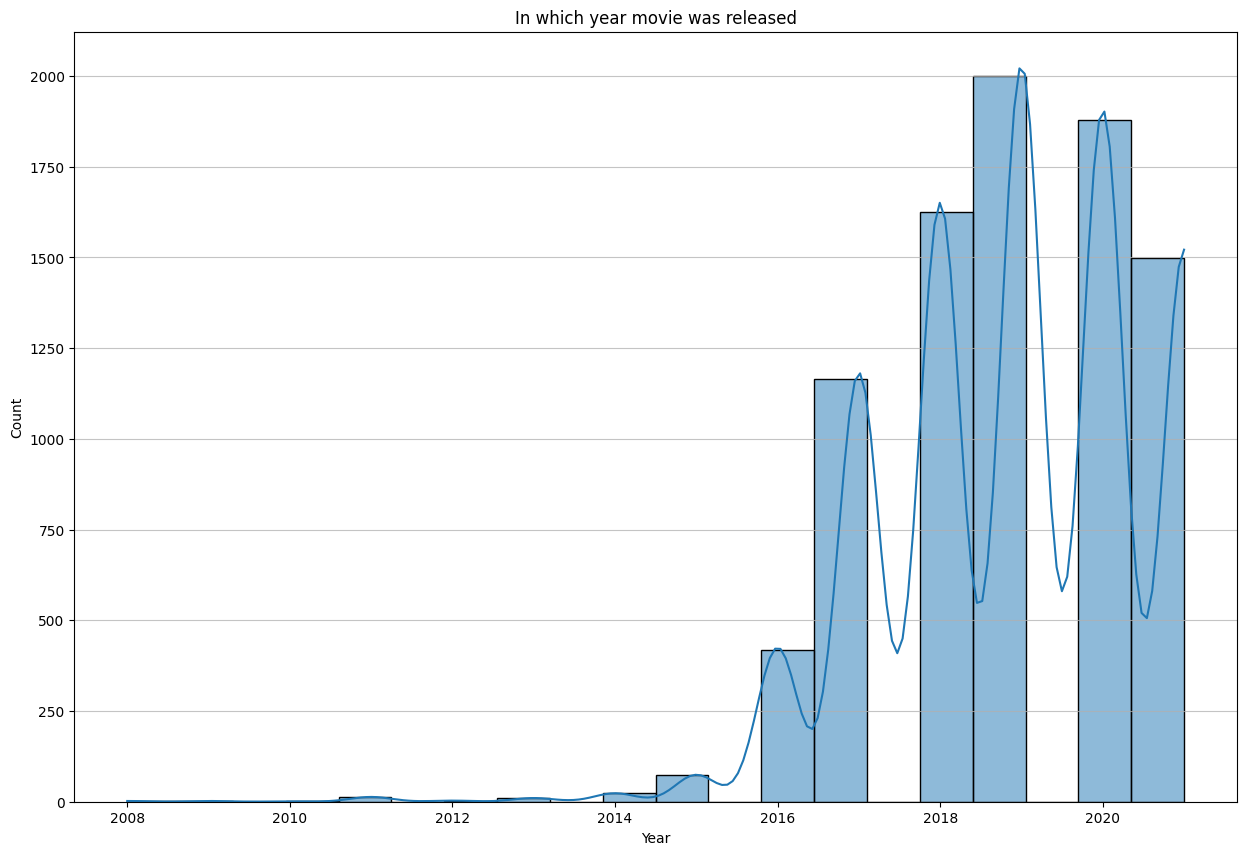

In [38]:
plt.figure(figsize=(15, 10))
print("Release year movie")
print("THe histogram of movie shows in which year most movies released.")
sns.histplot(data['year_added'], bins=20, kde=True)
plt.title('In which year movie was released')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram of release years indicates a growing trend in content production, with a significant increase in titles released in recent years (especially after 2010), peaking around 2018-2020.

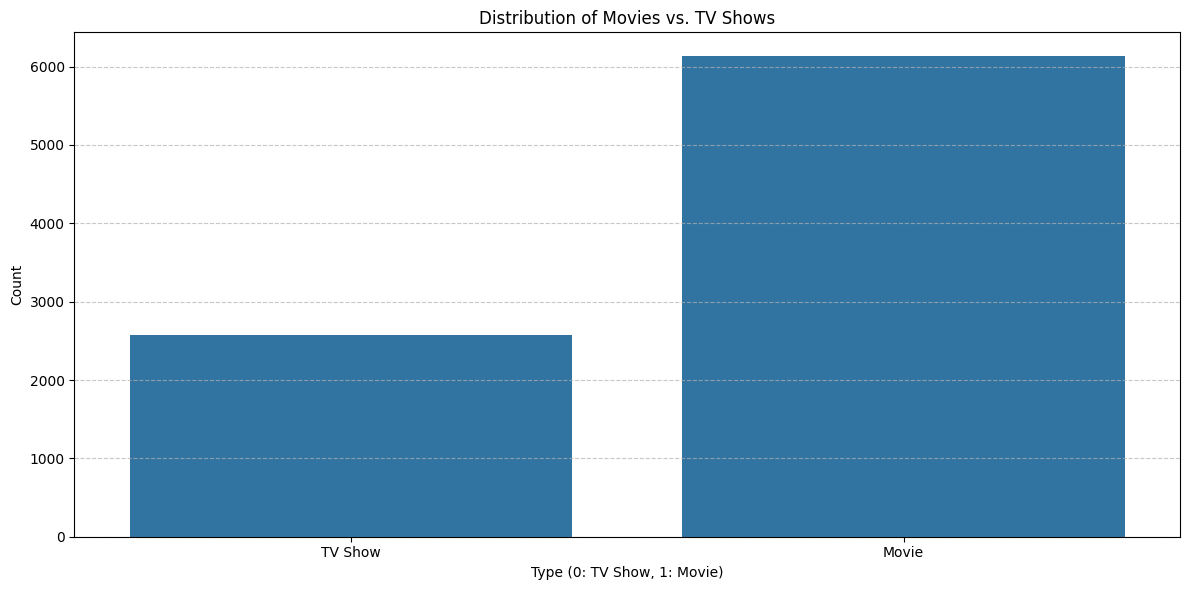

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='is_movie', data=data)
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type (0: TV Show, 1: Movie)')
plt.ylabel('Count')
plt.xticks([0, 1], ['TV Show', 'Movie'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar plot shows the proportion of movies to TV shows in the dataset. It reveals that there are significantly more movies than TV shows on Netflix.

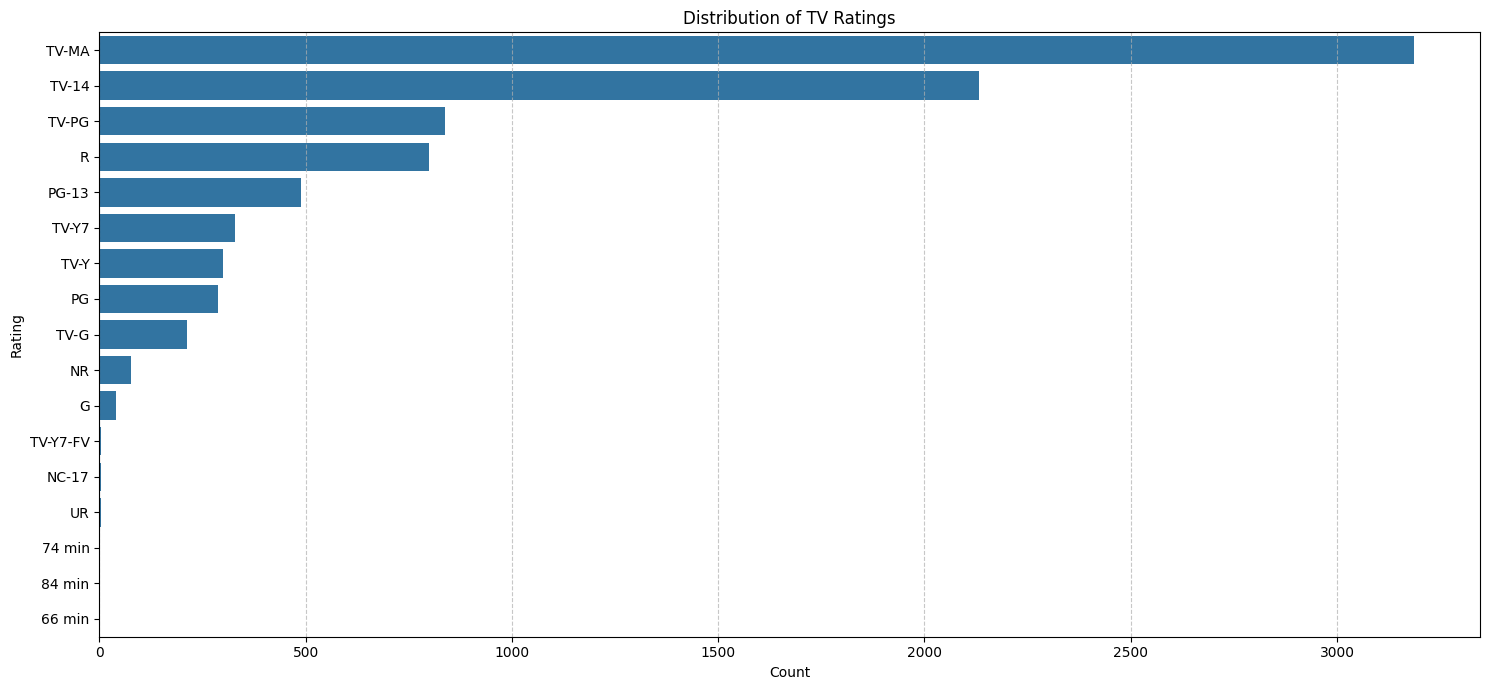

In [40]:
plt.figure(figsize=(15, 7))
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of TV Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart displays the frequency of different TV ratings. 'TV-MA' (Mature Audience) and 'TV-14' are the most common ratings, suggesting a large portion of Netflix content is aimed at older audiences.

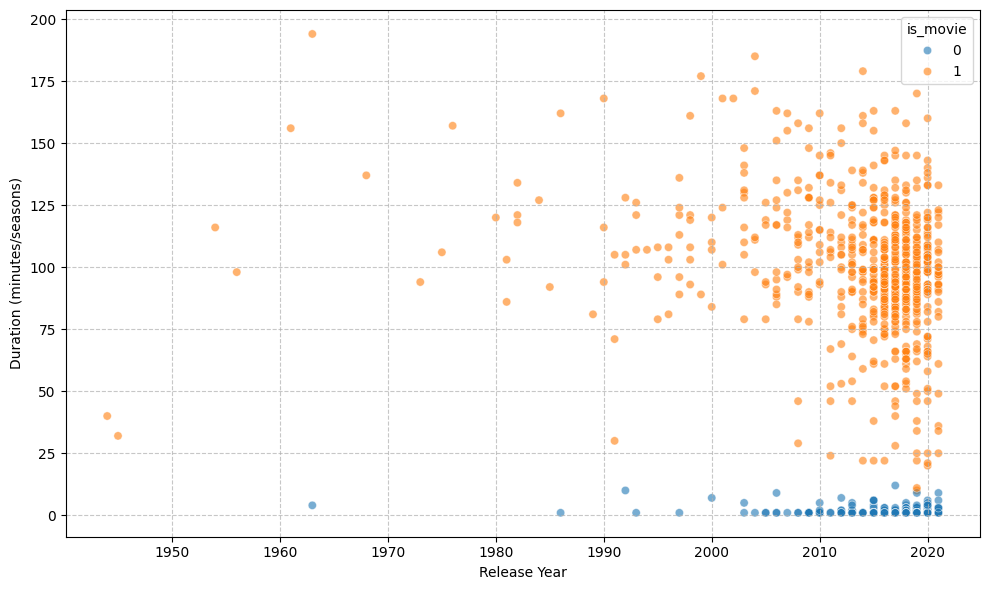

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_int', hue='is_movie', data=data.sample(n=1000, random_state=42), alpha=0.6)
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes/seasons)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between release year and duration, colored by content type. Movies generally have durations in minutes, while TV shows are represented by seasons (typically 1-2 seasons being most common, with some outliers). There's no clear linear trend between release year and duration for movies, but TV shows tend to have fewer seasons.

Bivariate analysis

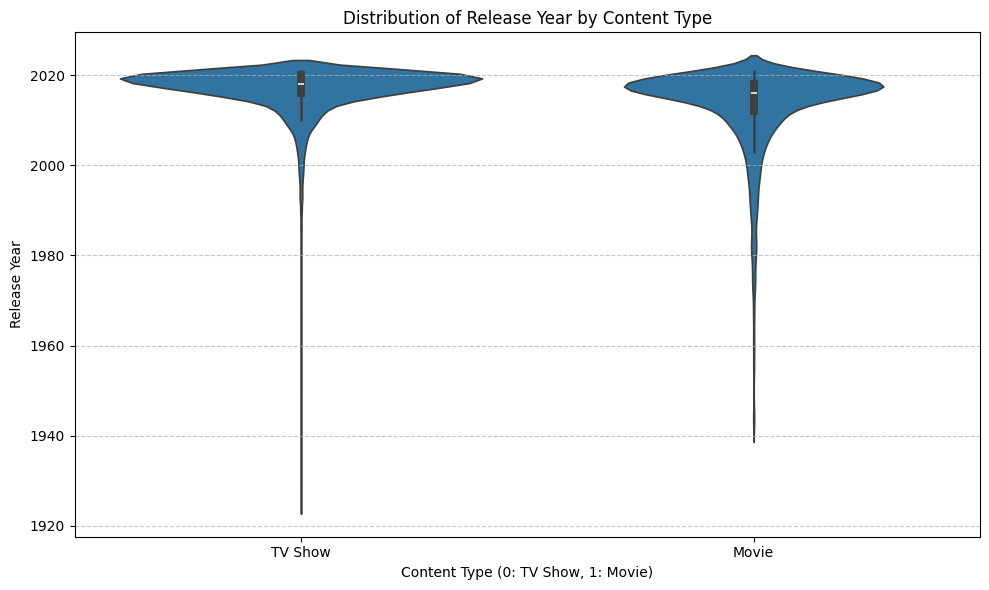

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_movie', y='release_year', data=data)
plt.title('Distribution of Release Year by Content Type')
plt.xlabel('Content Type (0: TV Show, 1: Movie)')
plt.ylabel('Release Year')
plt.xticks([0, 1], ['TV Show', 'Movie'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This violin plot shows the distribution of release years for movies and TV shows. Both types of content show a similar trend of increasing releases over the years, with a denser concentration of newer releases, particularly for movies.

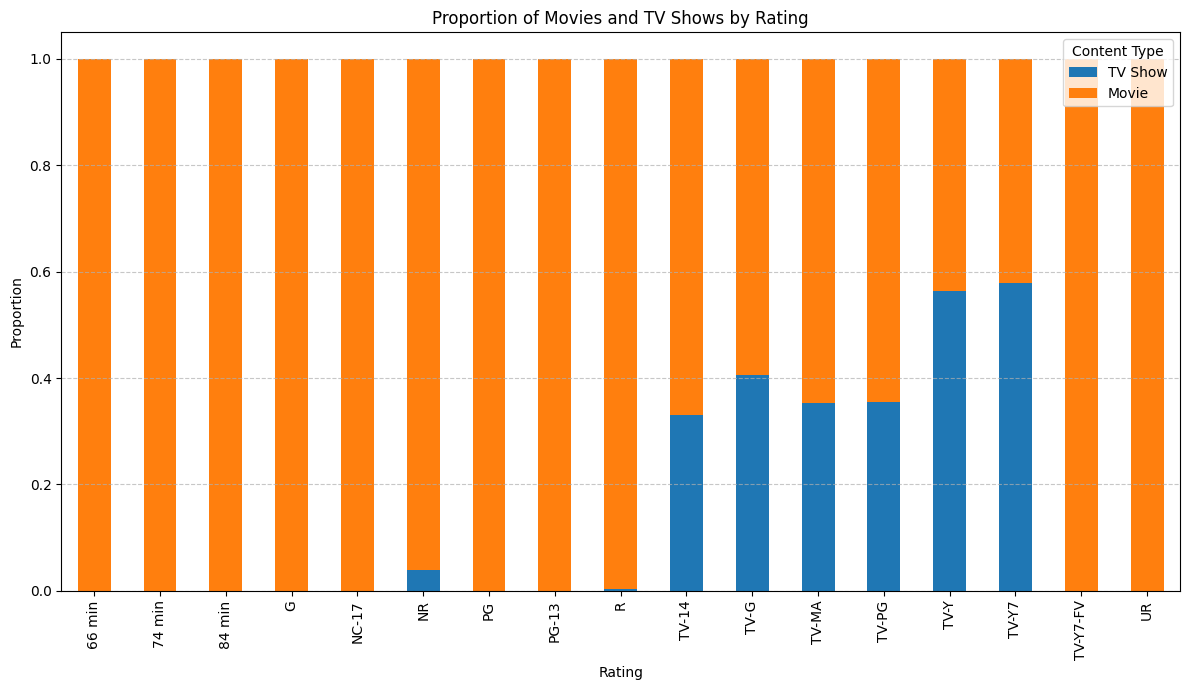

In [43]:
rating_type_crosstab = pd.crosstab(data['rating'], data['is_movie'], normalize='index')
rating_type_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Proportion of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.legend(title='Content Type', labels=['TV Show', 'Movie'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This stacked bar plot illustrates the proportion of movies and TV shows within each rating category. Some ratings like 'PG-13' or 'PG' are predominantly movies, while 'TV-Y' or 'TV-G' might have a higher proportion of TV shows, indicating different content types target different age groups.

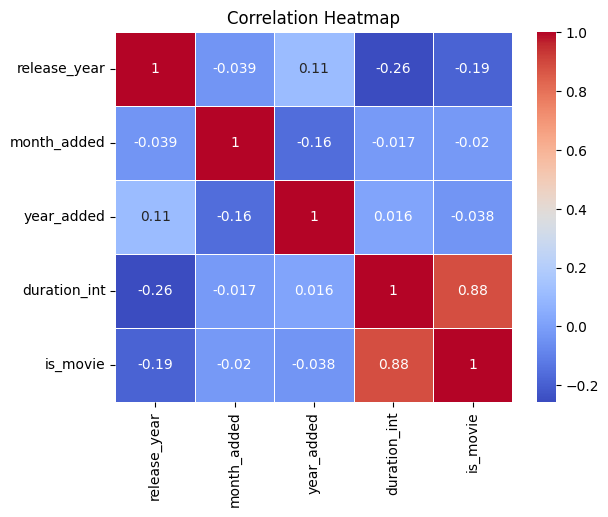

In [44]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Darker shades show highly positive correlation (they are highly correlated). Lighter shades show negative correlation i.e. if one variable is increasing, the other is decreasing.
Here we can see that duration_int and is_movie are highly correlated.

Machine Learning Model Implementation

In [45]:
results = {}

In [46]:
def train_and_evaluate_model(name,model, X_train, y_train, X_test, y_test):
    print(name)
    start_time = time.time()

# Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", cm)

     # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validation Accuracy (5-fold): Mean={cv_scores.mean():.4f}, Std={cv_scores.std():.4f}")

    results[name] = {
        'accuracy': accuracy,
        'training_time': training_time,
        'cv_accuracy_mean': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std()
    }


K-Nearest Neighbors (KNN)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model("KNN", knn, X_train, y_train, X_test, y_test)

KNN
Training time: 0.0076 seconds
Accuracy: 0.9070

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       773
           1       0.92      0.96      0.94      1840

    accuracy                           0.91      2613
   macro avg       0.90      0.87      0.88      2613
weighted avg       0.91      0.91      0.91      2613


Confusion Matrix:
 [[ 612  161]
 [  82 1758]]
Cross-validation Accuracy (5-fold): Mean=0.9014, Std=0.0053


Logistic Regression

In [48]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')
train_and_evaluate_model("Logistic Regression", lr, X_train, y_train, X_test, y_test)

Logistic Regression
Training time: 0.0223 seconds
Accuracy: 0.9740

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       773
           1       0.99      0.97      0.98      1840

    accuracy                           0.97      2613
   macro avg       0.96      0.98      0.97      2613
weighted avg       0.98      0.97      0.97      2613


Confusion Matrix:
 [[ 764    9]
 [  59 1781]]
Cross-validation Accuracy (5-fold): Mean=0.9708, Std=0.0040


SVM

In [49]:
sv=SVC(kernel='linear')
train_and_evaluate_model("SVM", sv, X_train, y_train, X_test, y_test)

SVM
Training time: 1.9017 seconds
Accuracy: 0.9747

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       773
           1       1.00      0.97      0.98      1840

    accuracy                           0.97      2613
   macro avg       0.96      0.98      0.97      2613
weighted avg       0.98      0.97      0.97      2613


Confusion Matrix:
 [[ 766    7]
 [  59 1781]]
Cross-validation Accuracy (5-fold): Mean=0.9700, Std=0.0051


AdaBoost

In [50]:
adb=AdaBoostClassifier(n_estimators=50, random_state=42)
train_and_evaluate_model("AdaBoost", adb, X_train, y_train, X_test, y_test)

AdaBoost
Training time: 0.2676 seconds
Accuracy: 0.9671

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       773
           1       1.00      0.95      0.98      1840

    accuracy                           0.97      2613
   macro avg       0.95      0.98      0.96      2613
weighted avg       0.97      0.97      0.97      2613


Confusion Matrix:
 [[ 773    0]
 [  86 1754]]
Cross-validation Accuracy (5-fold): Mean=0.9521, Std=0.0132


XGBoost

In [51]:
xgb=XGBClassifier()
train_and_evaluate_model("xgboost", xgb, X_train, y_train, X_test, y_test)

xgboost
Training time: 0.2062 seconds
Accuracy: 0.9770

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       773
           1       0.99      0.98      0.98      1840

    accuracy                           0.98      2613
   macro avg       0.97      0.98      0.97      2613
weighted avg       0.98      0.98      0.98      2613


Confusion Matrix:
 [[ 752   21]
 [  39 1801]]
Cross-validation Accuracy (5-fold): Mean=0.9693, Std=0.0063


Decision Tree

In [52]:
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test)

Decision Tree
Training time: 0.0132 seconds
Accuracy: 0.9690

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       773
           1       0.98      0.98      0.98      1840

    accuracy                           0.97      2613
   macro avg       0.96      0.96      0.96      2613
weighted avg       0.97      0.97      0.97      2613


Confusion Matrix:
 [[ 729   44]
 [  37 1803]]
Cross-validation Accuracy (5-fold): Mean=0.9613, Std=0.0063


Random Forest

In [53]:
rf = RandomForestClassifier(random_state=42)
train_and_evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)

Random Forest
Training time: 0.4389 seconds
Accuracy: 0.9767

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       773
           1       0.99      0.98      0.98      1840

    accuracy                           0.98      2613
   macro avg       0.97      0.98      0.97      2613
weighted avg       0.98      0.98      0.98      2613


Confusion Matrix:
 [[ 752   21]
 [  40 1800]]
Cross-validation Accuracy (5-fold): Mean=0.9692, Std=0.0049


Neural Networks (Multilayer Perceptron

In [54]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10)
train_and_evaluate_model("Neural Network (MLP)", nn_model, X_train, y_train, X_test, y_test)

Neural Network (MLP)
Training time: 2.4598 seconds
Accuracy: 0.9679

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       773
           1       0.99      0.96      0.98      1840

    accuracy                           0.97      2613
   macro avg       0.95      0.97      0.96      2613
weighted avg       0.97      0.97      0.97      2613


Confusion Matrix:
 [[ 763   10]
 [  74 1766]]
Cross-validation Accuracy (5-fold): Mean=0.9629, Std=0.0040


Comparison of Machine Learning Models

In [55]:
comparison_data = pd.DataFrame.from_dict(results, orient='index')
print("Model Performance Comparison:")
print(comparison_data.sort_values(by='accuracy', ascending=False))

Model Performance Comparison:
                      accuracy  training_time  cv_accuracy_mean  \
xgboost               0.977038       0.206156          0.969323   
Random Forest         0.976655       0.438865          0.969160   
SVM                   0.974742       1.901724          0.969981   
Logistic Regression   0.973976       0.022299          0.970800   
Decision Tree         0.969001       0.013178          0.961285   
Neural Network (MLP)  0.967853       2.459831          0.962927   
AdaBoost              0.967088       0.267598          0.952099   
KNN                   0.907003       0.007588          0.901410   

                      cv_accuracy_std  
xgboost                      0.006309  
Random Forest                0.004913  
SVM                          0.005072  
Logistic Regression          0.003973  
Decision Tree                0.006262  
Neural Network (MLP)         0.004027  
AdaBoost                     0.013175  
KNN                          0.005341  


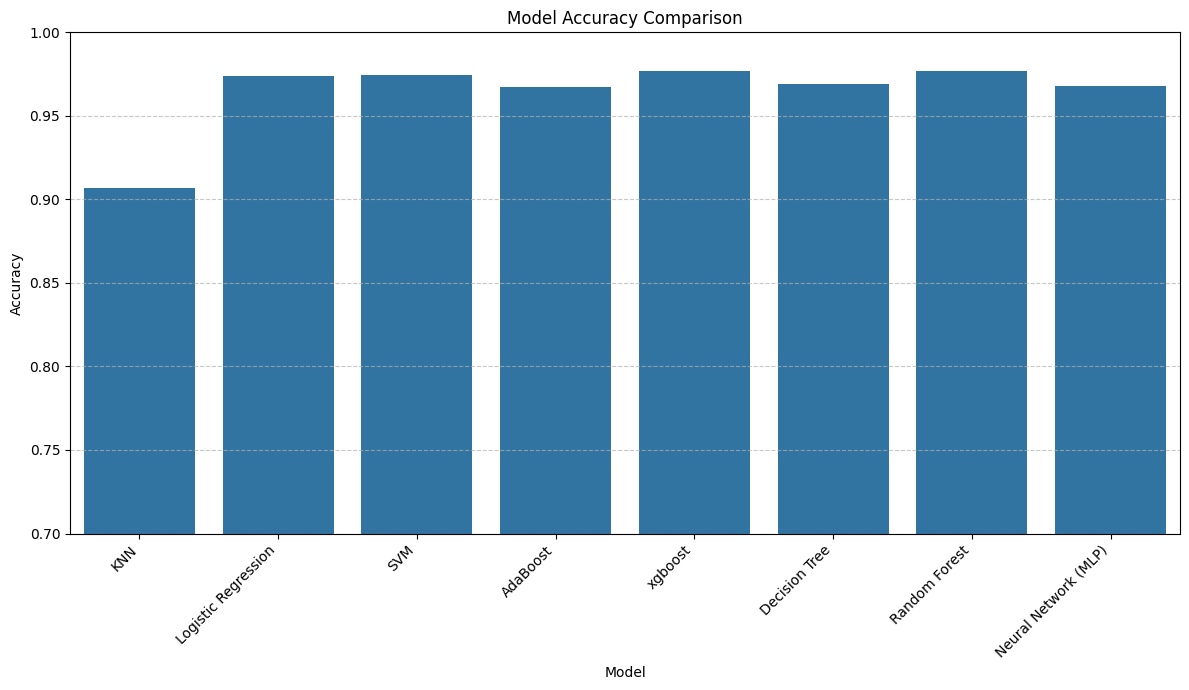

In [56]:
plt.figure(figsize=(12, 7))
sns.barplot(x=comparison_data.index, y='accuracy', data=comparison_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart visually compares the accuracy of each machine learning model on the test set. Higher bars indicate better performance.

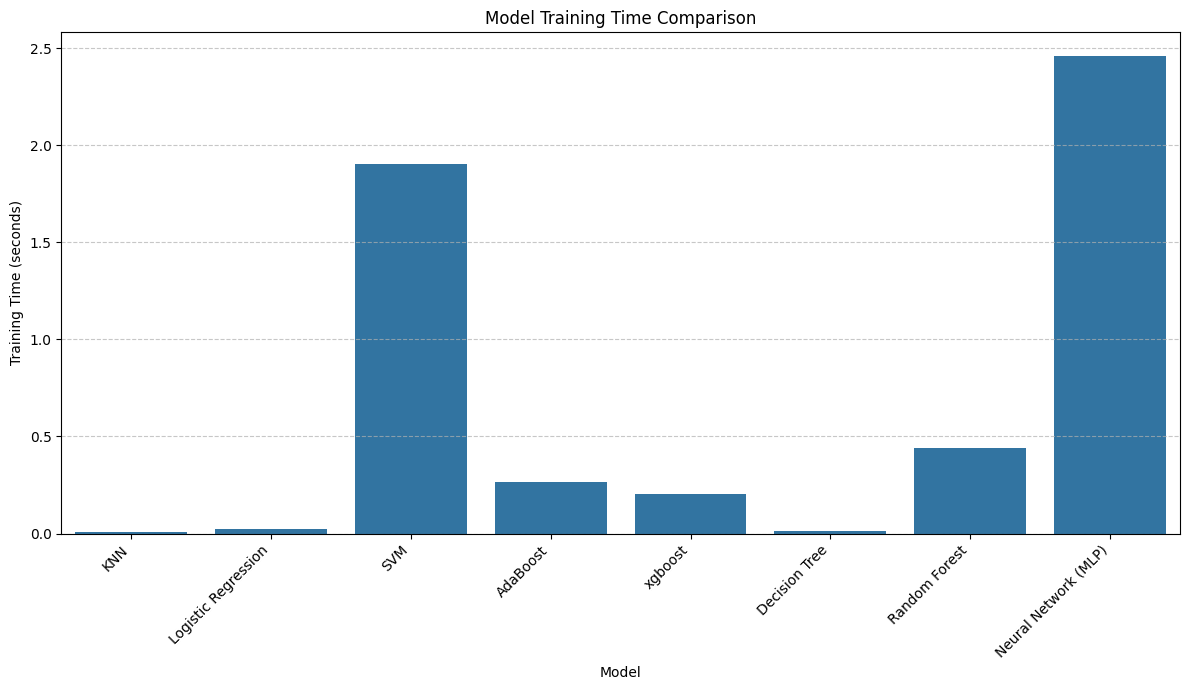

In [57]:
plt.figure(figsize=(12, 7))
sns.barplot(x=comparison_data.index, y='training_time', data=comparison_data)
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar chart illustrates the training time for each model. Shorter bars indicate faster training. This is an important metric, especially for large datasets

## Observation

**Accuracy:**  

- XGBoost is the best-performing model, achieving the highest test accuracy of 0.9770, closely followed by Random Forest at 0.9766, SVM at 0.9747 and Logistic Regression at 0.9739.
- KNN has the lowest accuracy at 0.9070, making it the least effective among the listed models.
- AdaBoost (0.9671 accuracy) and Decision Tree (0.9690 accuracy) also show respectable, but slightly lower, performance compared to the top ensemble and linear models. AdaBoost also has a comparatively higher standard deviation in CV (0.0132), indicating less stability than other models.
<br> <br>

**Cross-validation:** The cross-validation accuracy means for the top models (XGBoost, Random Forest, SVM, Logistic Regression) are consistently high (all above 0.969), and their standard deviations are relatively low (below 0.006). This indicates that their performance is robust and generalizes well across different subsets of the data, suggesting low variance and good stability.
<br> <br>

**Training Time:**
- Logistic Regression is remarkably fast (0.0247 seconds) while maintaining good accuracy.
- KNN is the fastest (0.0082 seconds) but at a significant cost to accuracy.
- XGBoost and Random Forest have highest accuracy with moderate training times (0.795s and 0.444s respectively), which is a good balance for their performance.
- SVM and Neural Network (MLP) have the longest training times (1.738s and 2.710s respectively). While SVM's accuracy is competitive, the MLP's accuracy is slightly lower than the top models despite its high training time.
<br> <br>

## Conclusion

For this classification task, XGBoost and Random Forest are the most accurate models, providing a good combination of high accuracy and reasonable computational cost. Logistic Regression also offers a balance of high accuracy and fast training time. The consistent high performance of these models across test and cross-validation sets confirms that the data preprocessing and feature engineering steps have successfully created a highly discriminative feature set for classifying Netflix content.
